# 05/18(수) 실습문제 - 신뢰구간 추정과 가설검정

제출시 HTML(.html) 형식으로 다운로드한 뒤, 올려주세요.

In [1]:
# 수치 계산에 사용하는 라이브러리
import numpy as np
import pandas as pd
import scipy as sp
from scipy import stats

# 그래프를 그리기 위한 라이브러리
from matplotlib import pyplot as plt
import seaborn as sns
sns.set()

# 표시 자릿수 지정
%precision 3
# 그래프를 주피터 노트북에 그리기 위한 설정
%matplotlib inline

---

## 1. 점 추정과 신뢰구간
아래 데이터 읽기 코드를 먼저 실행하고, height 데이터에 대해 아래 문제를 푸시오.

In [2]:
data = pd.read_csv("health2018.csv")
height = data[data.sex == 'F'].height
height

2       157.7
3       151.0
4       146.1
5       157.2
7       168.8
        ...  
5958    157.9
5963    159.8
5964    156.9
5965    145.2
5967    163.1
Name: height, Length: 3332, dtype: float64

In [3]:
data

,ID,sex,age,height,weight,waist,BMI,Blood_glucose
0,A901020501,M,80,162.4,56.0,82.2,21.233226,103
1,A901021301,M,78,167.7,76.4,98.3,27.166096,127
2,A901021302,F,75,157.7,53.2,80.7,21.391845,134
3,A901022601,F,43,151.0,53.5,79.7,23.463883,99
4,A901023303,F,80,146.1,57.6,93.0,26.984977,111
...,...,...,...,...,...,...,...,...
5963,R904028502,F,35,159.8,55.6,70.1,21.773149,90
5964,R904028503,F,66,156.9,63.9,87.3,25.957028,93
5965,R904028902,F,73,145.2,51.8,77.2,24.569512,99
5966,R904029201,M,43,176.8,84.1,99.2,26.904906,108


### 1-1. 샘플사이즈 10일 때, 표본평균의 90% 신뢰구간을 구하시오.
힌트: 자유도 9의 t분포 사용.

In [4]:
sample= np.random.choice(
    height, size = 10, replace = False)
sample

array([148.5, 168.4, 158.8, 160.6, 157.9, 148.7, 169. , 155.1, 164.5,
       165. ])

In [5]:
mu = np.mean(sample)
mu

159.65

In [6]:
df = len(sample)-1
df

9

In [7]:
sigma = np.std(sample, ddof = 1)
se = sigma / np.sqrt(len(sample)) #표본평균/루트N
se

2.323180291468286

In [8]:
interval = stats.t.interval(alpha = 0.90, df = df, loc = mu, scale = se) # 95프로 신뢰구간 
interval
# 교수님 예상값(153.72046372603444, 161.35306568573083)

(155.39134816282345, 163.90865183717656)

### 1-2. 복원추출로 샘플사이즈 10의 표본평균을 1000번 구하고, 그중 위 신뢰구간에 들어가는 비율을 계산하시오.

In [83]:
loc = np.mean(height)
scale = np.std(height)
print(loc)
print(scale)

157.53676470588263
6.582459829579061


In [97]:
be_included_array = np.zeros(1000, dtype = "bool")

In [98]:
np.random.seed(1)
norm_dist = stats.norm(loc = loc, scale = scale) # 모평균, 모표준편차
for i in range(0, 1000):
    sample = norm_dist.rvs(size = 10) # 10개씩 뽑음
    df = len(sample) - 1 # 자유도
    mu = np.mean(sample) # 표본평균
    std = np.std(sample, ddof = 1) #표본표준편차
    se = std / np.sqrt(len(sample)) #STANDARD ERROR
    interval = stats.t.interval(0.90, df, mu, se) # 신뢰구간
    if(interval[0] <= loc and interval[1] >= loc):
        be_included_array[i] = True

In [99]:
be_included_array

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True, False,  True,  True,  True,
        True, False,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True, False,  True,
        True,  True,  True,  True,  True,  True,  True, False,  True,
        True,  True,  True, False,  True, False,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True, False,  True, False,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True, False,  True,
        True, False,  True,  True,  True,  True, False,  True,  True,
        True,  True,  True,  True,  True, False,  True,  True,  True,
        True,  True,

In [100]:
sum(be_included_array) / len(be_included_array)
#교수님 예상값 0.936

0.902

---

## 2. t검정과 그룹 비교 시각화
아래 코드를 이용해 19세 남성과 19세 여성의 데이터를 10개씩 추출해 data2에 저장한다. 

In [14]:
data_man = data[(data.age==19) & (data.sex=='M')][0:10]
data_woman = data[(data.age==19) & (data.sex=='F')][0:10]

data2 = pd.concat([data_man, data_woman])
data2

,ID,sex,age,height,weight,waist,BMI,Blood_glucose
257,A908029804,M,19,175.0,76.1,84.2,24.848980,89
348,A912023404,M,19,174.2,56.9,68.8,18.750634,86
355,A912027503,M,19,175.1,83.3,85.7,27.168941,85
940,A931020901,M,19,183.3,70.3,74.6,20.923310,95
1271,B906020503,M,19,174.1,65.2,69.4,21.510478,88
1673,C905020203,M,19,169.9,65.0,72.4,22.517833,88
1787,C909021804,M,19,171.1,79.4,90.6,27.121923,92
1819,D901021703,M,19,176.6,60.6,70.6,19.430824,85
1934,D904026404,M,19,178.4,68.1,81.9,21.397223,87
2292,E905027103,M,19,180.7,72.2,79.4,22.111637,95


<AxesSubplot:xlabel='sex', ylabel='BMI'>

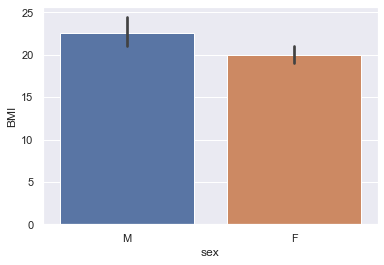

In [15]:
sns.barplot(data = data2, x='sex', y='BMI')

### 2-1. 위와 같이 sns.barplot을 이용해 남성과 여성의 BMI 평균값을 막대그래프로 표시하였다. 남성과 여성 표본에서 95% 신뢰구간을 t분포에 기반해 계산하고, 그래프의 오차막대와 일치하는지 확인하라.

In [16]:
data.sex.value_counts()

F    3332
M    2636
Name: sex, dtype: int64

In [17]:
m_loc=np.mean(data[data.sex == 'M'].BMI)
w_loc=np.mean(data[data.sex == 'F'].BMI)
print(m_loc)
print(w_loc)

24.539226925868707
23.506470605192092


In [18]:
#ans1
m_mu = np.mean(data_man.BMI)
w_mu = np.mean(data_woman.BMI)
print(m_mu)
print(w_mu)

22.57817834
19.998649148000002


In [19]:
#ans2
m_sigma = np.std(data_man.BMI,  ddof = 1)
w_sigma = np.std(data_woman.BMI,  ddof = 1)
print(m_sigma)
print(w_sigma)

2.9236149412697383
1.7478697449757346


In [20]:
m_se = m_sigma / np.sqrt(10)
w_se = w_sigma / np.sqrt(10)
print(m_se)
print(w_se)

0.9245282215711781
0.5527249447420968


In [21]:
stats.t.interval(
    alpha = 0.95, df = 9, loc = m_mu, scale = m_se)

(20.48675020141657, 24.669606478583432)

In [22]:
stats.t.interval(
    alpha = 0.95, df = 9, loc = w_mu, scale = w_se)

(18.74829845522605, 21.248999840773955)

### 2-2. 대응표본 t검정과 독립표본 t검정을 사용해 남성과 여성의 BMI 평균이 다른지 검정하라 (두 p값을 비교해보라).
이 경우, 대응표본 t검정과 독립표본 t검정 중 어느 방법이 더 적절한가? 왜 그러한지 설명하시오.

In [23]:
#대웅표본 t검정

In [24]:
# 약을 먹기 전과 먹기 후의 표본평균
man = data2.query('sex == "M"')["BMI"]
woman = data2.query('sex == "F"')["BMI"]
# 배열형으로 변환
man = np.array(man)
woman = np.array(woman)
print(man)
print(woman)
# 차이 계산
diff = man - woman
diff

[24.849 18.751 27.169 20.923 21.51  22.518 27.122 19.431 21.397 22.112]
[19.304 21.183 19.947 19.993 23.376 16.431 19.624 19.398 20.957 19.773]


array([ 5.545, -2.432,  7.222,  0.93 , -1.866,  6.087,  7.497,  0.033,
        0.44 ,  2.338])

In [25]:
np.mean(data2.BMI)

21.288

In [26]:
stats.ttest_1samp(diff,np.mean(data2.BMI))

Ttest_1sampResult(statistic=-15.839839571333496, pvalue=7.022383731838118e-08)

In [27]:
stats.ttest_rel(man, woman)

Ttest_relResult(statistic=2.1839532152377092, pvalue=0.05680736151004805)

In [28]:
#독립표본 t검정

In [29]:
stats.ttest_ind(man, woman, equal_var = False)

Ttest_indResult(statistic=2.394767153966043, pvalue=0.03042517147864766)

In [30]:
#답
#2.1839532152377092 0.05680736151004805
#2.394767153966043 0.03042517147864766
# 거의 비슷한 값으로 나온다 

---

## 3. 분할표 검정 및 시각화

In [31]:
data3 = data[data.age<=20]    # 만 19~20세 남녀.
len(data3)

111

In [32]:
data3

,ID,sex,age,height,weight,waist,BMI,Blood_glucose
163,A906023903,F,20,166.2,57.5,70.0,20.816409,91
182,A906029304,M,20,167.2,58.4,75.3,20.890090,95
197,A907023103,F,20,164.0,57.4,73.2,21.341463,84
256,A908029803,F,20,157.2,52.7,68.3,21.325810,89
257,A908029804,M,19,175.0,76.1,84.2,24.848980,89
...,...,...,...,...,...,...,...,...
5511,O905024003,F,19,164.9,52.9,67.2,19.454244,88
5550,O906025503,M,19,173.4,78.4,83.7,26.074613,97
5627,O908030303,M,20,177.0,88.5,89.8,28.248588,87
5652,O909028301,M,20,180.4,81.3,79.2,24.981441,92


### 3-1. BMI 25 이상인 사람은 '비만', BMI 25 미만은 '정상'으로 분류한 뒤, 성별에 따라 비만 빈도를 표시하는 분할표(교차표)를 생성하라. 

In [33]:
data3['obesity'] = ['Obese' if b >= 25 else 'Normal' for b in data3['BMI']]
data3

C:\Users\pc\AppData\Local\Temp/ipykernel_21652/930097920.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data3['obesity'] = ['Obese' if b >= 25 else 'Normal' for b in data3['BMI']]


,ID,sex,age,height,weight,waist,BMI,Blood_glucose,obesity
163,A906023903,F,20,166.2,57.5,70.0,20.816409,91,Normal
182,A906029304,M,20,167.2,58.4,75.3,20.890090,95,Normal
197,A907023103,F,20,164.0,57.4,73.2,21.341463,84,Normal
256,A908029803,F,20,157.2,52.7,68.3,21.325810,89,Normal
257,A908029804,M,19,175.0,76.1,84.2,24.848980,89,Normal
...,...,...,...,...,...,...,...,...,...
5511,O905024003,F,19,164.9,52.9,67.2,19.454244,88,Normal
5550,O906025503,M,19,173.4,78.4,83.7,26.074613,97,Obese
5627,O908030303,M,20,177.0,88.5,89.8,28.248588,87,Obese
5652,O909028301,M,20,180.4,81.3,79.2,24.981441,92,Normal


In [34]:
cross = pd.crosstab(data3.sex, data3.obesity)
cross

obesity,Normal,Obese
sex,,
F,54,7
M,39,11


In [35]:
#답

### 3-2. 분할표 검정(카이제곱 검정)을 시행해 성별에 따라 과체중의 빈도가 다른지 p값을 구하시오.

In [36]:
sp.stats.chi2_contingency(cross, correction = False)
#나름 비슷하다 

(2.240153358011634,
 0.13446764312934373,
 1,
 array([[51.108,  9.892],
        [41.892,  8.108]]))

### 3-3. 위의 분할표에서 관찰된 샘플 수가 모두 2배가 된다면, 분할표 검정 결과는 어떻게 되는가?

In [37]:
sp.stats.chi2_contingency(cross*2, correction = False)

(4.480306716023268,
 0.03428756718303286,
 1,
 array([[102.216,  19.784],
        [ 83.784,  16.216]]))